In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [63]:
train = pd.read_csv('titanic_train.csv')

In [64]:
test = pd.read_csv('titanic_test.csv')

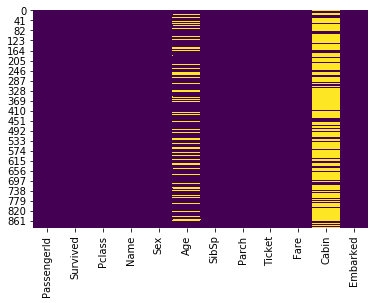

In [65]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=False)

In [66]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [67]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isna(age):
        if pclass == 1:
            return 38.233441
        elif pclass == 2:
            return 29.877630
        else:
            return 25.140620
    else:
        return age
                
            

In [68]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

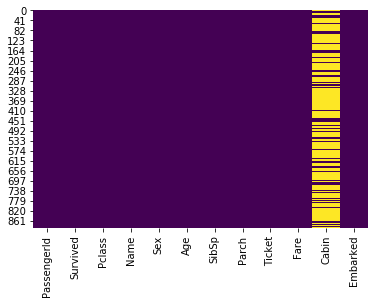

In [69]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=False)

In [70]:
def clean(dataframe,drop_cols,axis,impute_cols,cols_dummy,impute_func):
    df = dataframe.drop(drop_cols,axis=axis)
    df[impute_cols[0]] = df[impute_cols[1]].apply(impute_func,axis=1)
    for col in cols_dummy:
        dummy = pd.get_dummies(df[col],drop_first=True)
        df.drop(col,axis=1,inplace=True)
        df = pd.concat([df,dummy],axis=1)
    df.dropna()
    return df
    
    

In [71]:
train = clean(dataframe=train,drop_cols=['Ticket','Cabin','Name','PassengerId'],axis=1,impute_cols=('Age',['Age','Pclass']),cols_dummy=['Embarked','Sex'],impute_func=impute_age)

In [72]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


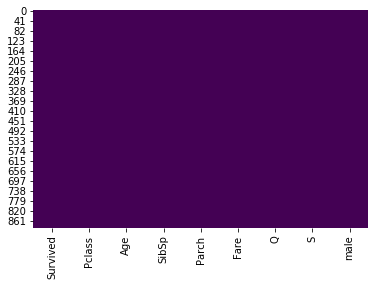

In [73]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=False)

In [74]:
test.groupby('Pclass')['Age'].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [76]:
def impute_age_(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isna(age):
        if pclass == 1:
            return 40.918367
        elif pclass == 2:
            return 28.777500
        else:
            return 24.027945
    else:
        return age
                

In [77]:
test = clean(dataframe=test,drop_cols=['Ticket','Cabin','Name','PassengerId'],axis=1,impute_cols=('Age',['Age','Pclass']),cols_dummy=['Embarked','Sex'],impute_func=impute_age)

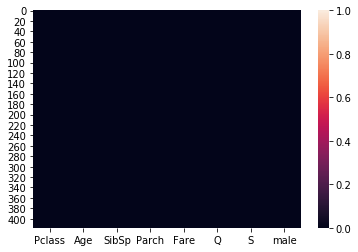

In [78]:
sns.heatmap(test.isnull())

In [79]:
from sklearn.linear_model import LogisticRegression

In [83]:
X = train.drop('Survived',axis=1)
y = train["Survived"]

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [86]:
lr = LogisticRegression()

In [87]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
pred = lr.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix,classification_report

In [93]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.82      0.86      0.84       134
          1       0.77      0.71      0.74        89

avg / total       0.80      0.80      0.80       223



In [94]:
import keras 

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [108]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [109]:
model = Sequential([
    Dense(units=8,kernel_initializer='uniform',input_shape=(8,),activation='relu' ),
    Dense(units=4,kernel_initializer='uniform',activation='relu' ),
    Dropout(0.3),
    Dense(units=4,kernel_initializer='uniform',activation='relu' ),
    Dense(units=1,kernel_initializer='uniform',activation='sigmoid')
])

In [110]:
model.compile('adam','binary_crossentropy',['accuracy'])

In [116]:
history = model.fit(X_train,y_train,epochs=1000,batch_size=10,validation_data=(X_test,y_test),validation_split=0.3)

Train on 668 samples, validate on 223 samples
Epoch 1/1000
668/668 [==============================] - 0s 209us/step - loss: 0.5130 - acc: 0.7799 - val_loss: 0.4928 - val_acc: 0.7848
Epoch 2/1000
668/668 [==============================] - 0s 202us/step - loss: 0.5147 - acc: 0.7814 - val_loss: 0.4952 - val_acc: 0.7713
Epoch 3/1000
668/668 [==============================] - 0s 176us/step - loss: 0.5223 - acc: 0.7784 - val_loss: 0.4991 - val_acc: 0.7982
Epoch 4/1000
668/668 [==============================] - 0s 160us/step - loss: 0.5074 - acc: 0.7665 - val_loss: 0.4859 - val_acc: 0.8027
Epoch 5/1000
668/668 [==============================] - 0s 152us/step - loss: 0.4985 - acc: 0.7814 - val_loss: 0.4814 - val_acc: 0.7803
Epoch 6/1000
668/668 [==============================] - 0s 150us/step - loss: 0.5408 - acc: 0.7590 - val_loss: 0.4912 - val_acc: 0.7758
Epoch 7/1000
668/668 [==============================] - 0s 144us/step - loss: 0.5185 - acc: 0.7680 - val_loss: 0.4836 - val_acc: 0.7803
Ep

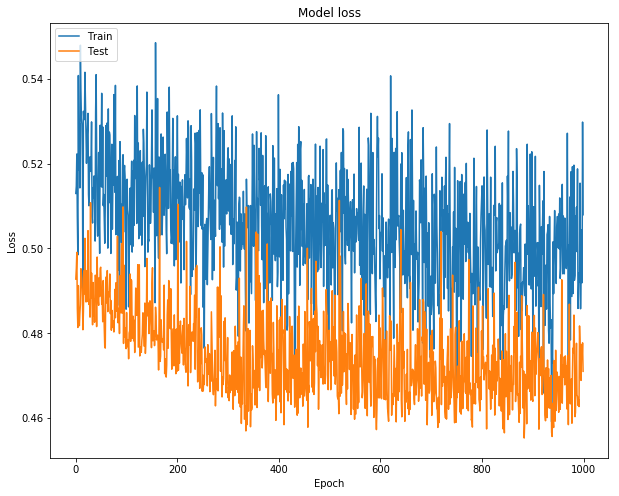

In [117]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [114]:
pred = model.predict_classes(X_test)

In [115]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.79      0.90      0.84       134
          1       0.80      0.64      0.71        89

avg / total       0.79      0.79      0.79       223



In [118]:
def do(func,x):
    return func(x)

In [119]:
do(np.sqrt,1)

1.0